In [1]:
from shared import *
import utils.forge as forge
from utils.wearable_types import get_wearable_types_df
wearable_types_df = get_wearable_types_df()
forge_activity_df = forge.get_forge_activity_df().merge(wearable_types_df[['name', 'rarity', 'slotNames', 'forge_alloy', 'smelt_alloy']], left_on='item.id', right_index=True)
forge_activity_df['alloy_locked'] = (forge_activity_df['forge_alloy'] - forge_activity_df['smelt_alloy']) * (forge_activity_df['activity'] == 'itemSmelteds')
forge_activity_df['forge_count'] = forge_activity_df['activity'].apply(lambda x: 1 if x == 'itemForgeds' else 0)
forge_activity_df['smelt_count'] = forge_activity_df['activity'].apply(lambda x: 1 if x == 'itemSmelteds' else 0)
forge_activity_df['change_in_supply'] = forge_activity_df['forge_count'] - forge_activity_df['smelt_count']
def get_forge_activity_totals_by_column(forge_activity_df, column_name):
    return forge_activity_df.groupby([column_name]).agg({'alloy_locked': 'sum', 'forge_count': 'sum', 'smelt_count': 'sum', 'change_in_supply': 'sum'})
forge_activity_by_week = get_forge_activity_totals_by_column(forge_activity_df, 'startOfWeek').reset_index().rename(columns={'alloy_locked': 'Alloy Locked'})
forge_activity_by_month = get_forge_activity_totals_by_column(forge_activity_df, 'yearMonth').reset_index().rename(columns={'alloy_locked': 'Alloy Locked'})


## Forge Activity

* *Alloy Locked*: The 10% alloy cost that is removed from circulation (via burning or sending to the Aavegotchi DAO) every time a wearable is smelted.
* *Change in Circulating Supply*: The difference in the number of times wearables have been forged vs smelted, which impacts the circulating supply of that wearable.

In [2]:
total_forge_activity = pd.DataFrame(forge_activity_df.agg({'forge_count': 'sum', 'smelt_count': 'sum', 'alloy_locked': 'sum', 'change_in_supply': 'sum'}), columns=["Total"]).T.rename(columns={'alloy_locked': 'Alloy Locked', 'forge_count': 'Items Forged', 'smelt_count': 'Items Smelted', 'change_in_supply': 'Change in Circulating Supply'})
show_itable(total_forge_activity)

### Forge Activity Over Time

/Users/michael/Documents/git/aavegotchi-wearables-report/charts/grouped_bar_chart.py:37: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0,0),1,1, color=series_colors[series], edgecolor=border_color) for series in series_names]
/Users/michael/Documents/git/aavegotchi-wearables-report/charts/grouped_bar_chart.py:57: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self._fig.show()


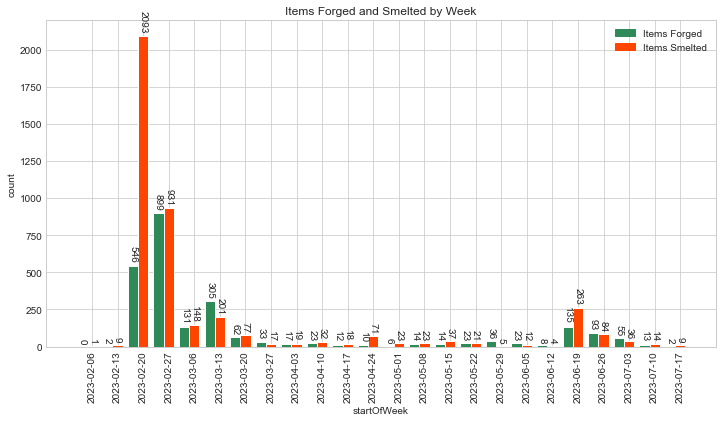

In [8]:
# %%capture --no-display
# hide the warning about bar color and edge color

items_forged_by_week = forge_activity_by_week[['startOfWeek', 'forge_count']].copy()
items_forged_by_week['activity'] = 'Items Forged'
items_forged_by_week.rename(columns={'forge_count': 'count'}, inplace=True)
items_smelted_by_week = forge_activity_by_week[['startOfWeek', 'smelt_count']].copy()
items_smelted_by_week['activity'] = 'Items Smelted'
items_smelted_by_week.rename(columns={'smelt_count': 'count'}, inplace=True)

items_forged_smelted_by_week = pd.concat([items_forged_by_week, items_smelted_by_week]).sort_values(by='startOfWeek')
items_forged_smelted_by_week_chart = GroupedBarChart(items_forged_smelted_by_week, 'startOfWeek', 'count', 'activity', { 'Items Forged': 'seagreen', 'Items Smelted': 'orangered' })
items_forged_smelted_by_week_chart.annotate_bars(annotation_format='{:.0f}', rotation=-90)
items_forged_smelted_by_week_chart.set_title('Items Forged and Smelted by Week')
items_forged_smelted_by_week_chart.set_tick_params(axis='x', labelrotation=90)
items_forged_smelted_by_week_chart.show()

/Users/michael/Documents/git/aavegotchi-wearables-report/charts/grouped_bar_chart.py:37: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [plt.Rectangle((0,0),1,1, color=series_colors[series], edgecolor=border_color) for series in series_names]
/Users/michael/Documents/git/aavegotchi-wearables-report/charts/grouped_bar_chart.py:57: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self._fig.show()


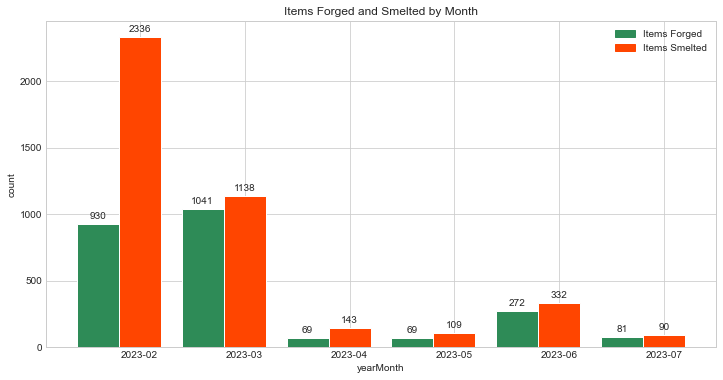

In [10]:
# %%capture --no-display
# hide the warning about bar color and edge color

items_forged_by_month = forge_activity_by_month[['yearMonth', 'forge_count']].copy()
items_forged_by_month['activity'] = 'Items Forged'
items_forged_by_month.rename(columns={'forge_count': 'count'}, inplace=True)
items_smelted_by_month = forge_activity_by_month[['yearMonth', 'smelt_count']].copy()
items_smelted_by_month['activity'] = 'Items Smelted'
items_smelted_by_month.rename(columns={'smelt_count': 'count'}, inplace=True)

items_forged_smelted_by_month = pd.concat([items_forged_by_month, items_smelted_by_month]).sort_values(by='yearMonth')
items_forged_smelted_by_month_chart = GroupedBarChart(items_forged_smelted_by_month, 'yearMonth', 'count', 'activity', { 'Items Forged': 'seagreen', 'Items Smelted': 'orangered' })
items_forged_smelted_by_month_chart.annotate_bars(annotation_format='{:.0f}', rotation=0)
items_forged_smelted_by_month_chart.set_title('Items Forged and Smelted by Month')
items_forged_smelted_by_month_chart.show()

### Alloy Locked by Week

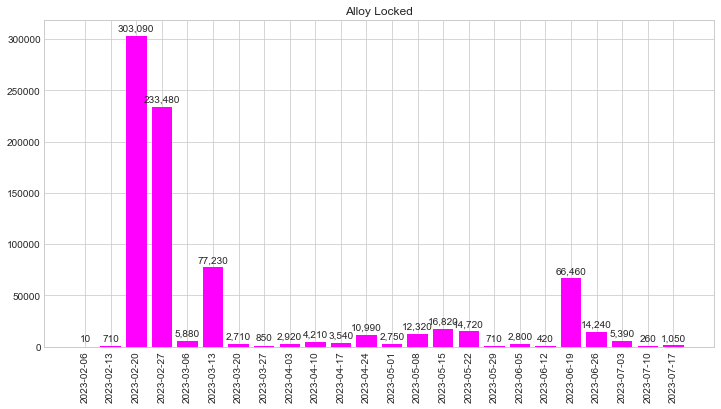

In [4]:
fig, ax = get_bar_charts(forge_activity_by_week, 'startOfWeek', ['Alloy Locked'], [GHST_COLOR])
ax.tick_params(axis='x', labelrotation=90)
plt.show()

### Alloy Locked by Month

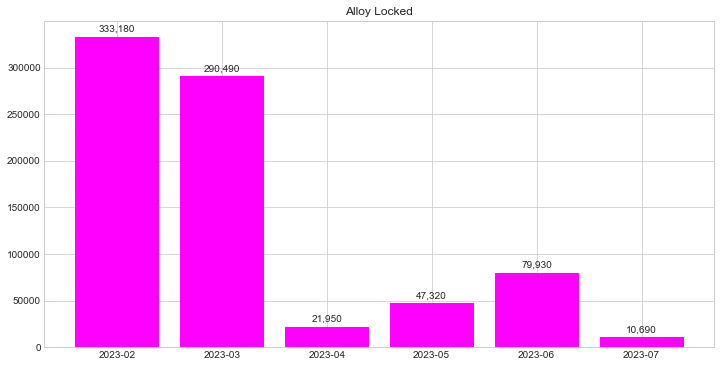

In [5]:
fig, ax = get_bar_charts(forge_activity_by_month, 'yearMonth', ['Alloy Locked'], [GHST_COLOR])
plt.show()

### Forge Activity by Wearable

In [6]:
forge_activity_by_wearable = get_forge_activity_totals_by_column(forge_activity_df, 'name')
show_itable_long(forge_activity_by_wearable.reset_index().rename(columns={'name': 'Wearable', 'alloy_locked': 'Alloy Locked', 'forge_count': '# Forged', 'smelt_count': '# Smelted', 'change_in_supply': 'Change in Circulating Supply'}))

### Forge Activity by Rarity

In [7]:
forge_activity_by_rarity = get_forge_activity_totals_by_column(forge_activity_df, 'rarity')
show_itable_long(forge_activity_by_rarity.reset_index().rename(columns={'rarity': 'Rarity', 'alloy_locked': 'Alloy Locked', 'forge_count': '# Forged', 'smelt_count': '# Smelted', 'change_in_supply': 'Change in Circulating Supply'}), order=[1, 'desc'])